# ***Question 1 debugged***

In [32]:

#Here is the correct answer i have tried
#some problems found in this program are:
#idx += 1 line should be outside the if block, and second, the fruit_id should be compared with the idx after the return statement and the  the idx += 1 line is placed outside the if block, and the raise RuntimeError line is outside the loop, ensuring it is only raised if the loop completes without finding a match for the given fruit_id.
# You can copy this code to your personal pipeline project or execute it here.
def id_to_fruit(fruit_id: int, fruits: Set[str]) -> str:
    idx = 0
    for fruit in fruits:
        if fruit_id == idx:
            return fruit
        idx += 1
    raise RuntimeError(f"Fruit with id {fruit_id} does not exist")

name1 = id_to_fruit(1, {"apple", "orange", "melon", "kiwi", "strawberry"})
name3 = id_to_fruit(3, {"apple", "orange", "melon", "kiwi", "strawberry"})
name4 = id_to_fruit(4, {"apple", "orange", "melon", "kiwi", "strawberry"})

print(name1)  # Expected output: 'orange'
print(name3)  # Expected output: 'kiwi'
print(name4)  # Expected output: 'strawberry'

strawberry
kiwi
apple


# **Question 2 Debugged**

In [34]:
#Here we are going to swap x and y values

#some found problems are: indexing of the coordinates when swapping, once the problem is solved, the swap function should correctly flip the x and y coordinates in the coords array.


import numpy as np
def swap(coords: np.ndarray):
#wrong way
  """coords[:, 0], coords[:, 1], coords[:, 2], coords[:, 3], = coords[:, 1], coords[:, 1], coords[:, 3], coords[:, 2]
  return coords"""
#correct answer for this problem

  coords[:, [0, 1, 2, 3]] = coords[:, [1, 0, 3, 2]]
  return coords

# **Question 3 Debugged**

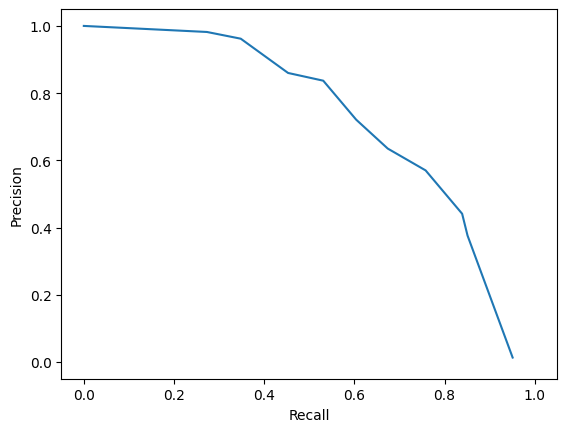

In [37]:
def plot_data(csv_file_path: str):
    # load data
    results = []
    with open(csv_file_path) as result_csv:
        csv_reader = csv.reader(result_csv, delimiter=',')
        next(csv_reader)
        for row in csv_reader:
            results.append([float(value) for value in row])  # Convert values to float
        results = np.array(results)

    # plot precision-recall curve
    plt.plot(results[:, 1], results[:, 0])
    plt.ylim([-0.05, 1.05])
    plt.xlim([-0.05, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()

f = open("data_file.csv", "w")
w = csv.writer(f)
_ = w.writerow(["precision", "recall"])
w.writerows([[0.013,0.951],
             [0.376,0.851],
             [0.441,0.839],
             [0.570,0.758],
             [0.635,0.674],
             [0.721,0.604],
             [0.837,0.531],
             [0.860,0.453],
             [0.962,0.348],
             [0.982,0.273],
             [1.0,0.0]])
f.close()
plot_data('data_file.csv')


# Question 4 Debugged but complicated to make some moves

In [ ]:
#Here are the two main issues found in the code:
#Structural Bug: Batch Size Mismatch in Discriminator Output:
#When changing the batch size from 32 to 64, you will encounter a structural bug related to the size of the output tensor from the discriminator.
#To fix this, you need to ensure that the output tensor size matches the size of all_samples_labels by modifying the discriminator output layer.
#Cosmetic Bug: Incorrect Discriminator Output Labeling:
#There is a cosmetic bug where the labels for the generated samples in the discriminator training step are incorrectly set to real_samples_labels.
#This should be corrected to generated_samples_labels to ensure proper training.
# Inside the Discriminator class, modify the output layer to match the size.

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(28 * 28, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(256, 1),  # Output layer size changed to 1
            nn.Sigmoid()
        )

# Inside the training loop, fix the label for generated samples
for epoch in range(num_epochs):
    for n, (real_samples, mnist_labels) in enumerate(train_loader):

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)

        # Fix: Use generated_samples_labels for generator training
        loss_generator = loss_function(output_discriminator_generated, generated_samples_labels)

        loss_generator.backward()
        optimizer_generator.step()